In [66]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import os
%matplotlib inline

In [67]:
df= pd.read_csv('/content/Churn_Modelling.csv')

In [68]:
df.shape

(10000, 14)

In [69]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5687,5688,15691840,Fraser,505,Germany,Female,37,6,159863.90,2,0,1,125307.87,0
3945,3946,15652789,Hancock,657,Spain,Male,40,10,0.00,2,1,1,52990.70,0
8235,8236,15760177,Lombardi,564,Spain,Male,37,9,100252.18,1,1,1,146033.52,0
4469,4470,15692443,Piccio,612,Spain,Male,33,5,69478.57,1,1,0,8973.67,1
1702,1703,15713644,Marshall,686,Spain,Male,22,5,0.00,2,1,0,158974.45,0


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [71]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [72]:
df.dtypes


CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [73]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [74]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [75]:
cat_cols=['Geography','Gender']
num_cols=[col for col in df.columns if col not in cat_cols]

In [76]:
for col in cat_cols:
    print(f'{col} : {df[col].unique()}')

Geography : ['France' 'Spain' 'Germany']
Gender : ['Female' 'Male']


In [77]:
df['Gender'].replace({'Female':1,'Male':0},inplace=True)
df=pd.get_dummies(data=df, columns=['Geography'])

In [78]:
tenure_exited_0=df[df.Exited==0].Tenure
tenure_exited_1=df[df.Exited==1].Tenure

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


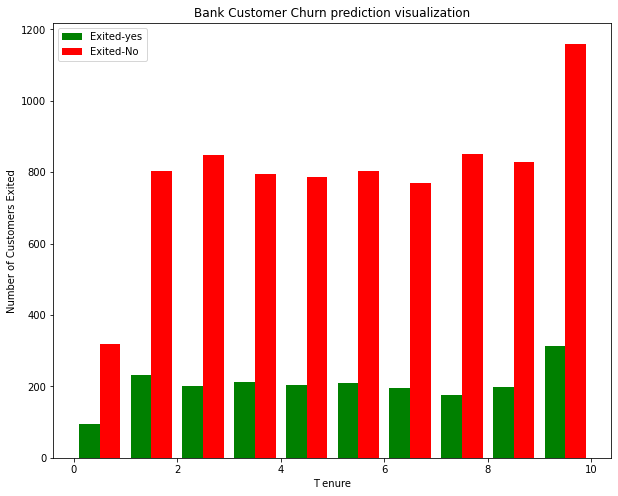

In [79]:

plt.figure(figsize=(10,8))
plt.xlabel('T enure')
plt.ylabel('Number of Customers Exited')
plt.title('Bank Customer Churn prediction visualization')
plt.hist([tenure_exited_1,tenure_exited_0], color=['green','red'], label=['Exited-yes','Exited-No'])
plt.legend()

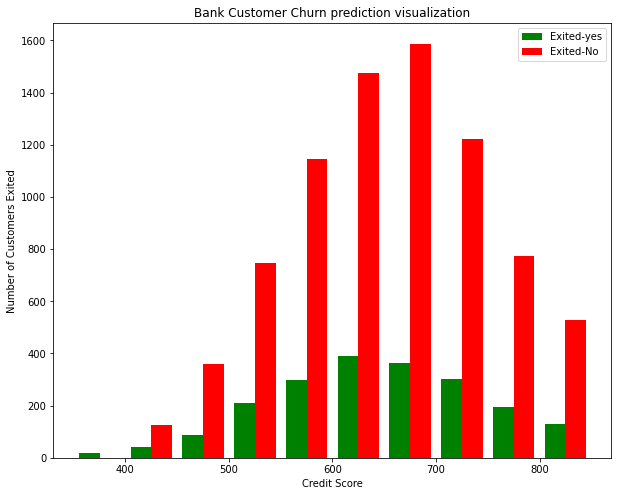

In [80]:
creditscore_exited_0=df[df.Exited==0].CreditScore
creditscore_exited_1=df[df.Exited==1].CreditScore

plt.figure(figsize=(10,8))
plt.xlabel('Credit Score')
plt.ylabel('Number of Customers Exited')
plt.title('Bank Customer Churn prediction visualization')
plt.hist([creditscore_exited_1,creditscore_exited_0], color=['green','red'], label=['Exited-yes','Exited-No'])
plt.legend()

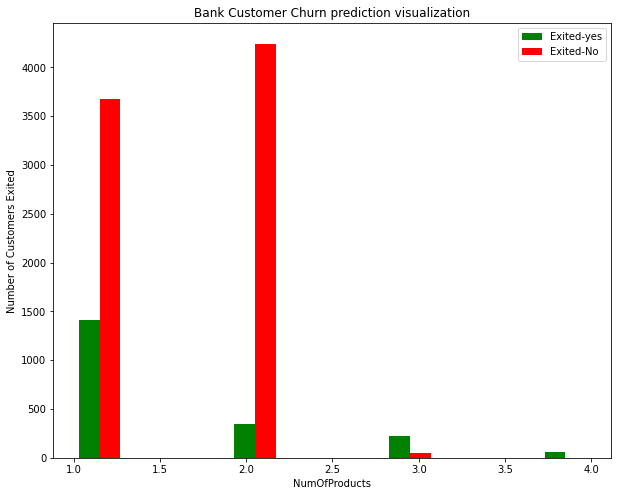

In [81]:
NumOfProducts_exited_0=df[df.Exited==0].NumOfProducts
NumOfProducts_exited_1=df[df.Exited==1].NumOfProducts

plt.figure(figsize=(10,8))
plt.xlabel('NumOfProducts')
plt.ylabel('Number of Customers Exited')
plt.title('Bank Customer Churn prediction visualization')
plt.hist([NumOfProducts_exited_1,NumOfProducts_exited_0], color=['green','red'], label=['Exited-yes','Exited-No'])
plt.legend()

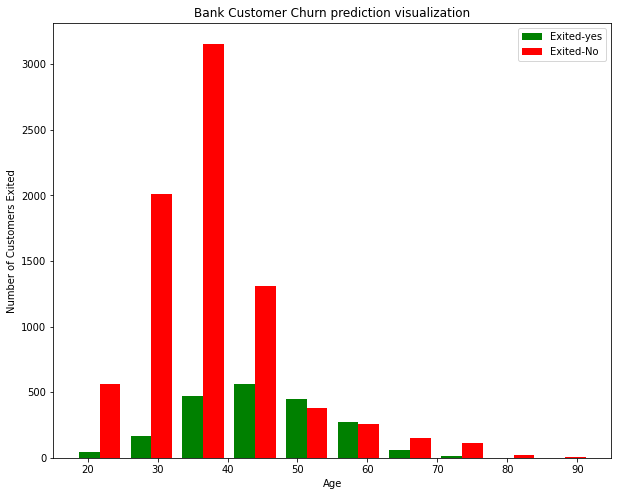

In [82]:
Age_exited_0=df[df.Exited==0].Age
Age_exited_1=df[df.Exited==1].Age

plt.figure(figsize=(10,8))
plt.xlabel('Age')
plt.ylabel('Number of Customers Exited')
plt.title('Bank Customer Churn prediction visualization')
plt.hist([Age_exited_1,Age_exited_0], color=['green','red'], label=['Exited-yes','Exited-No'])
plt.legend()

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Gender             10000 non-null  int64  
 2   Age                10000 non-null  int64  
 3   Tenure             10000 non-null  int64  
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  int64  
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  float64
 9   Exited             10000 non-null  int64  
 10  Geography_France   10000 non-null  uint8  
 11  Geography_Germany  10000 non-null  uint8  
 12  Geography_Spain    10000 non-null  uint8  
dtypes: float64(2), int64(8), uint8(3)
memory usage: 810.7 KB


In [84]:
# Scaling
cols_to_scale=['CreditScore','Tenure','Balance','NumOfProducts','EstimatedSalary','Age']

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

df[cols_to_scale]=scaler.fit_transform(df[cols_to_scale])

In [85]:
# Training
x=df.drop('Exited',axis=1)
y=df.Exited

from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=15,stratify=y)
def ANN(xtrain,xtest,ytrain,ytest,loss,weight):
    model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(12,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                 loss=loss,
                 metrics=['accuracy'])
    
    if weight==-1:
        model.fit(xtrain,ytrain,epochs=100)
    else:
        model.fit(xtrain,ytrain,epochs=100,class_weight=weight)
    print()
    print(model.evaluate(xtest,ytest))
    print()
    ypred= model.predict(xtest)
    ypred=np.round(ypred)
    print()
    print(classification_report(ytest,ypred))
        
    return ypred

In [86]:
ypred=ANN(xtrain,xtest,ytrain,ytest,'binary_crossentropy',-1)

Epoch 1/100
235/235 [==============================] - 1s 2ms/step - loss: 0.5278 - accuracy: 0.7816
Epoch 2/100
235/235 [==============================] - 0s 2ms/step - loss: 0.4695 - accuracy: 0.7983
Epoch 3/100
235/235 [==============================] - 0s 2ms/step - loss: 0.4550 - accuracy: 0.8043
Epoch 4/100
235/235 [==============================] - 0s 2ms/step - loss: 0.4457 - accuracy: 0.8093
Epoch 5/100
235/235 [==============================] - 0s 2ms/step - loss: 0.4385 - accuracy: 0.8108
Epoch 6/100
235/235 [==============================] - 0s 2ms/step - loss: 0.4322 - accuracy: 0.8143
Epoch 7/100
235/235 [==============================] - 0s 2ms/step - loss: 0.4273 - accuracy: 0.8140
Epoch 8/100
235/235 [==============================] - 0s 2ms/step - loss: 0.4227 - accuracy: 0.8151
Epoch 9/100
235/235 [==============================] - 0s 2ms/step - loss: 0.4191 - accuracy: 0.8184
Epoch 10/100
235/235 [==============================] - 0s 2ms/step - loss: 0.4157 - accura

Text(69.0, 0.5, 'Truth')

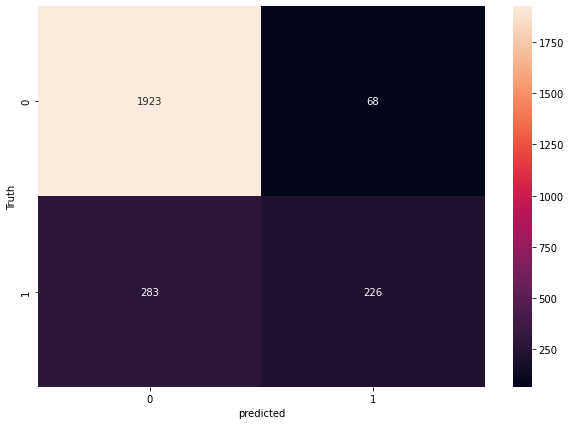

In [87]:
cm=tf.math.confusion_matrix(labels=ytest,predictions=ypred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [88]:
count_class_0, count_class_1 = df.Exited.value_counts()

In [89]:
df_class_0= df[df.Exited==0]
df_class_1= df[df.Exited==1]

In [90]:
df_class_0_under=df_class_0.sample(count_class_1)

df_test_under=pd.concat([df_class_0_under,df_class_1])

df_test_under.shape

(4074, 13)

In [91]:
# Training
x=df_test_under.drop('Exited',axis=1)
y=df_test_under.Exited

from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=15,stratify=y)

In [92]:
ypred=ANN(xtrain,xtest,ytrain,ytest,'binary_crossentropy',-1)

Epoch 1/100
96/96 [==============================] - 1s 3ms/step - loss: 0.6941 - accuracy: 0.5175
Epoch 2/100
96/96 [==============================] - 0s 3ms/step - loss: 0.6652 - accuracy: 0.6072
Epoch 3/100
96/96 [==============================] - 0s 4ms/step - loss: 0.6485 - accuracy: 0.6416
Epoch 4/100
96/96 [==============================] - 0s 4ms/step - loss: 0.6382 - accuracy: 0.6550
Epoch 5/100
96/96 [==============================] - 0s 5ms/step - loss: 0.6301 - accuracy: 0.6638
Epoch 6/100
96/96 [==============================] - 0s 5ms/step - loss: 0.6228 - accuracy: 0.6707
Epoch 7/100
96/96 [==============================] - 0s 3ms/step - loss: 0.6155 - accuracy: 0.6727
Epoch 8/100
96/96 [==============================] - 0s 2ms/step - loss: 0.6090 - accuracy: 0.6740
Epoch 9/100
96/96 [==============================] - 0s 2ms/step - loss: 0.6025 - accuracy: 0.6825
Epoch 10/100
96/96 [==============================] - 0s 2ms/step - loss: 0.5959 - accuracy: 0.6858
Epoch 11/

In [93]:
df_class_1_over= df_class_1.sample(count_class_0,replace=True)

df_test_over=pd.concat([df_class_0,df_class_1_over],axis=0)

df_test_over.shape

(15926, 13)

In [94]:
# Training
x=df_test_over.drop('Exited',axis=1)
y=df_test_over.Exited
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=15,stratify=y)

ypred=ANN(xtrain,xtest,ytrain,ytest,'binary_crossentropy',-1)

Epoch 1/100
374/374 [==============================] - 1s 2ms/step - loss: 0.6458 - accuracy: 0.6232
Epoch 2/100
374/374 [==============================] - 1s 2ms/step - loss: 0.6088 - accuracy: 0.6659
Epoch 3/100
374/374 [==============================] - 1s 2ms/step - loss: 0.5886 - accuracy: 0.6890
Epoch 4/100
374/374 [==============================] - 1s 2ms/step - loss: 0.5753 - accuracy: 0.7031
Epoch 5/100
374/374 [==============================] - 1s 2ms/step - loss: 0.5638 - accuracy: 0.7079
Epoch 6/100
374/374 [==============================] - 1s 2ms/step - loss: 0.5524 - accuracy: 0.7242
Epoch 7/100
374/374 [==============================] - 1s 2ms/step - loss: 0.5399 - accuracy: 0.7348
Epoch 8/100
374/374 [==============================] - 1s 2ms/step - loss: 0.5283 - accuracy: 0.7434
Epoch 9/100
374/374 [==============================] - 1s 2ms/step - loss: 0.5181 - accuracy: 0.7495
Epoch 10/100
374/374 [==============================] - 1s 2ms/step - loss: 0.5102 - accura

In [95]:
x=df.drop('Exited',axis=1)
y=df.Exited

from imblearn.over_sampling import SMOTE

smote= SMOTE(sampling_strategy='minority')

x_sm,y_sm=smote.fit_resample(x,y)

y_sm.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [96]:
xtrain,xtest,ytrain,ytest=train_test_split(x_sm,y_sm,test_size=0.25,random_state=15,stratify=y_sm)
ypred=ANN(xtrain,xtest,ytrain,ytest,'binary_crossentropy',-1)

Epoch 1/100
374/374 [==============================] - 1s 2ms/step - loss: 0.6673 - accuracy: 0.5878
Epoch 2/100
374/374 [==============================] - 1s 2ms/step - loss: 0.6212 - accuracy: 0.6622
Epoch 3/100
374/374 [==============================] - 1s 2ms/step - loss: 0.5952 - accuracy: 0.6906
Epoch 4/100
374/374 [==============================] - 1s 2ms/step - loss: 0.5733 - accuracy: 0.7106
Epoch 5/100
374/374 [==============================] - 1s 2ms/step - loss: 0.5555 - accuracy: 0.7260
Epoch 6/100
374/374 [==============================] - 1s 2ms/step - loss: 0.5400 - accuracy: 0.7388
Epoch 7/100
374/374 [==============================] - 1s 2ms/step - loss: 0.5273 - accuracy: 0.7510
Epoch 8/100
374/374 [==============================] - 1s 2ms/step - loss: 0.5160 - accuracy: 0.7552
Epoch 9/100
374/374 [==============================] - 1s 2ms/step - loss: 0.5067 - accuracy: 0.7619
Epoch 10/100
374/374 [==============================] - 1s 2ms/step - loss: 0.4986 - accura